<a href="https://colab.research.google.com/github/sabinaML/Mathematics_for_DS/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%BB%D1%8F_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline
     

In [ ]:
x=sym.Symbol('x')

# Задание 1
Вычислите производную функции в точке x0=1

In [ ]:
f=sym.tan(sym.sin(x)+sym.cos(2*x+3))**2
f

tan(sin(x) + cos(2*x + 3))**2

In [ ]:
sym.diff(f).subs(x,1.) # производная функции в точке x0=1

55.3859176353379

# Задание 2
Дан объект в  2D пространстве. При помощи матричных операций выполните:

Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)

(-200.0, 200.0)

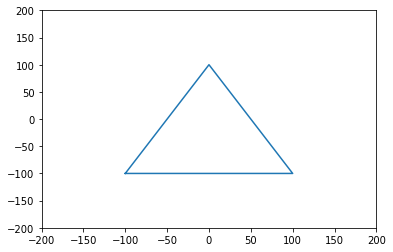

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [ ]:
b=np.array([[0.5,0],[0,1.2]]) # матрица для масштабирования на (0.5, 1.2) 
At=A[:,0:2].T
res=b@At
tt=res.T

(-200.0, 200.0)

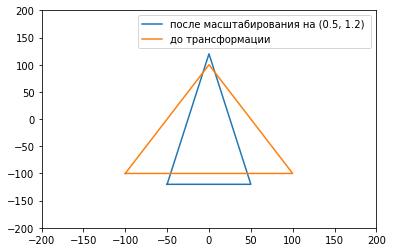

In [ ]:
x1 = tt[:,0]
y1 = tt[:,1]
plt.plot(x1, y1, label = 'после масштабирования на (0.5, 1.2) ')
plt.plot(x, y, label = 'до трансформации')
plt.legend()
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [ ]:
c=np.array([[200,300],[200,300], [200,300], [200,300]]) # матрица для смещения на (200, 300) 
tt2=c+A[:,0:2]

(-400.0, 400.0)

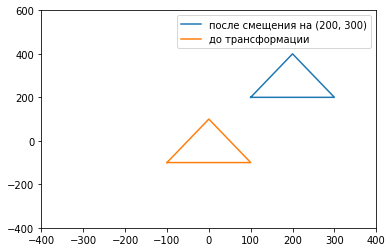

In [ ]:
x2 = tt2[:,0]
y2 = tt2[:,1]
plt.plot(x2, y2,  label = 'после смещения на (200, 300)')
plt.plot(x, y, label = 'до трансформации')
plt.legend()
plt.ylim([-400, 600])
plt.xlim([-400, 400])

Задание 3
Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
np.linalg.eig(m)[0] # собственные значения

array([ 3., -1.])

In [ ]:
np.linalg.eig(m)[1] # собственные вектора

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

# Задание 4
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [ ]:
from scipy.optimize import curve_fit
from scipy.optimize import minimize
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

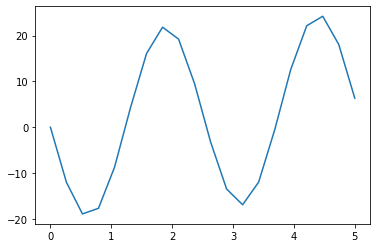

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))



In [ ]:
x0=np.array([3,1])

In [ ]:
res1=minimize(error, x0,  method='COBYLA', options={'xtol': 1e-8, 'disp':True})
res1.x

array([ 2.1174975 , -0.89671794])

In [ ]:
res = curve_fit(f, x, fx,p0=[-2,-2], method='lm')
res

(array([ 3. , -2.5]), array([[ 2.68953115e-18, -5.23196240e-20],
        [-5.23196240e-20,  2.80481710e-19]]))

In [ ]:
# значение a = 3, значение  b = -2.5

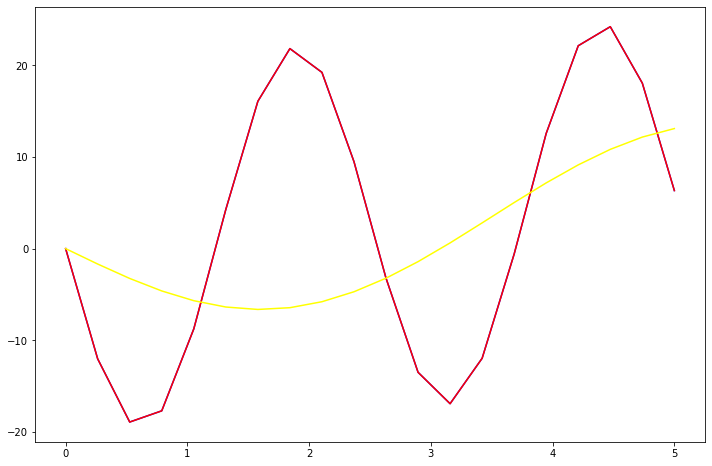

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, res[0][0], res[0][1]), color='red')
plt.plot(x, f(x, res1.x[0], res1.x[1]), color='yellow')
plt.show()

#Задание 5
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))
Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [ ]:
n=1
for i in raitings:
  m=[]
  l=dict()
  for j in raitings:
     cos = round(np.dot(i,j)/(np.linalg.norm(i)*np.linalg.norm(j)),2) # находим косинусное сходство между пользователями
     if cos==1: # если косинус=1, то заменяем на 0, тк это сравнение пользователя с самим собой
       cos=0
     m.append(cos)  #добавляем в список m косинусные значения сходства для каждого пользователя
  l[n]=m.index(max(m)) +1 # выводим в словарь для каждого пользователя индекс максимального значения косинусного сходства 
  n=n+1
  print(l)


{1: 9}
{2: 5}
{3: 10}
{4: 10}
{5: 9}
{6: 10}
{7: 2}
{8: 6}
{9: 1}
{10: 3}
